In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import Ridge

In [15]:
class Regr:
    def __init__(self, a, b, N):
        self.a = a
        self.b = b
        self.N = N
        
    #def f(self, x):
    #    return 3*x*x*x - 2*x*x +1

    def f(self, x):
        return math.sin(x)
    
    def getTestData(self, seed):
        np.random.seed(seed)
        deviation = 0.25
        x = np.random.uniform(self.a, self.b, self.N)
        y = np.vectorize(self.f)(x) + np.random.normal(0, deviation, self.N)
        return (x, y)

    def getModelledValueAt(self, x0, degree):
        (x, y) = self.getTestData()
        X = np.vander(x, degree+1)[:,:-1]
        Y = y.transpose()
        clf = Ridge(alpha=0.0)
        clf.fit(X, Y)
        return clf.predict(np.array([x0**(degree-i) for i in range(degree)]).reshape(1,-1))

    def show(self, poly_degrees, alphas, seed_getter):
        fig, axs = plt.subplots(len(poly_degrees), len(alphas))
        plt.subplots_adjust(hspace = 0.4)

        gridCount = 200
        grid = np.linspace(self.a, self.b, gridCount)
        seed_base = 7
        for (model_number, degree) in enumerate(poly_degrees):
            for (i, al) in enumerate(alphas):
               (x, y) = self.getTestData(seed_getter(model_number, i))
               X = np.vander(x, degree+1)[:,:-1]
               Y = y.transpose()
               clf = Ridge(alpha=al)
               clf.fit(X, Y)
               f_model = lambda x: clf.predict(np.array([x**(degree-i) for i in range(degree)]).reshape(1,-1))
               #print(f_model(3))
               axs[model_number, i].scatter(x, y, color='b')
               axs[model_number, i].plot(grid, np.vectorize(self.f)(grid), color='g')
               axs[model_number, i].plot(grid, np.vectorize(f_model)(grid), color='r')
               axs[model_number, i].set_title("Degree {}, alpha={}.".format(degree, al))
               min_y = np.min(np.vectorize(self.f)(grid)) - 1
               max_y = np.max(np.vectorize(self.f)(grid)) + 1
               axs[model_number, i].set_xlim([self.a, self.b])
               axs[model_number, i].set_ylim([min_y, max_y])
        plt.show()

In [10]:
# this makes matplotlib pictures larger
%matplotlib notebook
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12, 12]
mpl.rcParams['figure.dpi'] = 72

We will consider a simple (and somewhat artificial) problem of fitting a polynomial to a function sin on an interval  $[0,3]$. Given a degree $d$, we fit the following linear model (linear in $a_0, a_1, \ldots, a_d$),
$$
f(x) = a_0 + a_1 x + \ldots + a_d x^d
$$
to some $N$ samples $(x_i, \sin(x_i))$, where $i=1,2,\ldots, N$.
Below we will take $N=15$ samples, a different set of samples in each column. In rows we take $d=1,3,5,7,9,11,13$.
For fitting, we will take a usual linear regression.

Models in the first row have *high bias and low variance*. This means that for different runs (i.e., for different datasets), the predicted values at different points tend to be similar (the variance is small), but for example at point $0$ or $3$ predicted values are always too high, while at $1.5$ they are always too low.

On the other hand, models in the last row have *low bias and high variance*. They fit almost perfectly to given data samples. But, for example at point $1$, the value predicted in the first column is very high, in the last column -- very low, in the 4. column little too low, and in the 2. and 3. column moreless OK. So the variance is high and the bias is low (to be sure that the bias is low, one would have to calculate the expected value of the model at point $1$ and compare it with the true value, we suppose here without proof that these numbers would be similar).

In the situation when we have high variance we usually have also a much better fit to training data than to other (test) data. This is how we can observe high variance in practice when using neural nets: we would rather not train the same neural net on different datasets to see if it has high variance (that would be very time consuming and we would need a lot of training datasets).


<IPython.core.display.Javascript object>


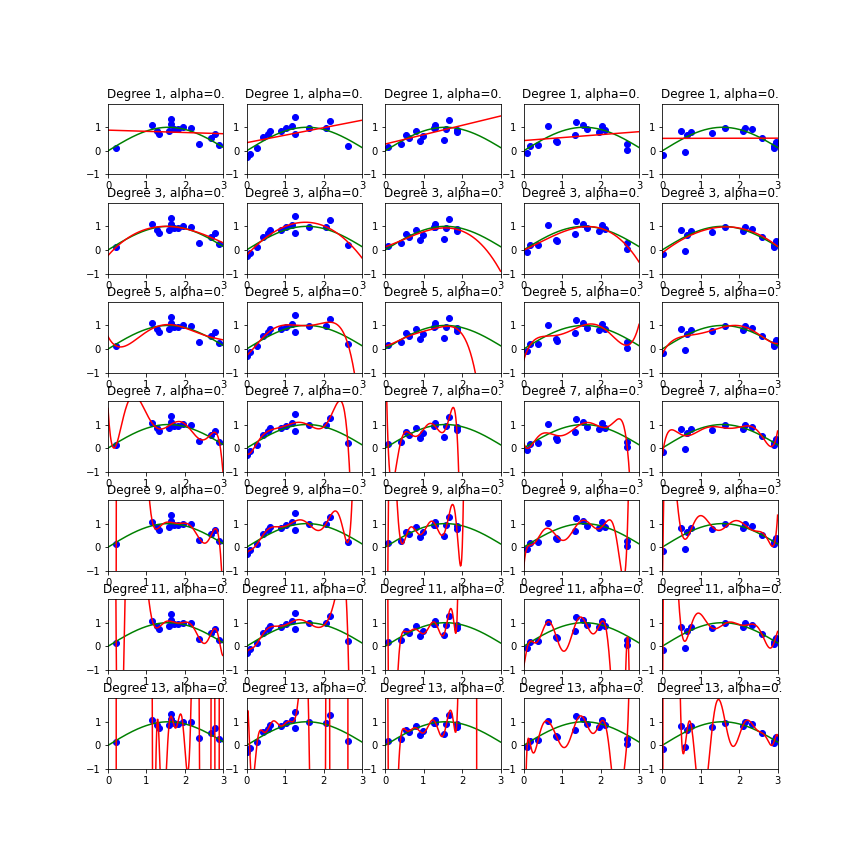

/home/b/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.76707e-20): result may not be accurate.
  overwrite_a=True).T
/home/b/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.84231e-17): result may not be accurate.
  overwrite_a=True).T
/home/b/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.92532e-18): result may not be accurate.
  overwrite_a=True).T
/home/b/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.91443e-23): result may not be accurate.
  overwrite_a=True).T
/home/b/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.55712e-20): result may not be accurate.
  overwrite_a=True).T
/home/b/.local/lib/python3.7/site-packages/sklearn/linear_mo

In [20]:
def get_same_seed_in_each_column(row, column):
    return column
Regr(0.0,3.0, 15).show(np.arange(1,15,2), [0,0,0,0,0], get_same_seed_in_each_column)

In the above graphs we may see that models that are too simple tend to have high bias (it is not possible to approximate well $sin$ on $[0,3]$ by a linear function), while models that have too much flexibility tend to have high variance. Therefore the most direct method of reducing overfitting is to use a 'right' model, here it would be one with degree of polynomial at most $2$.

Let us observe in the following graph that by taking a larger dataset (with $50$ samples) the problem  of high variance is not that visible. In other words, the other way of reducing overfitting is taking a larger dataset (which obviously is not always possible).

<IPython.core.display.Javascript object>


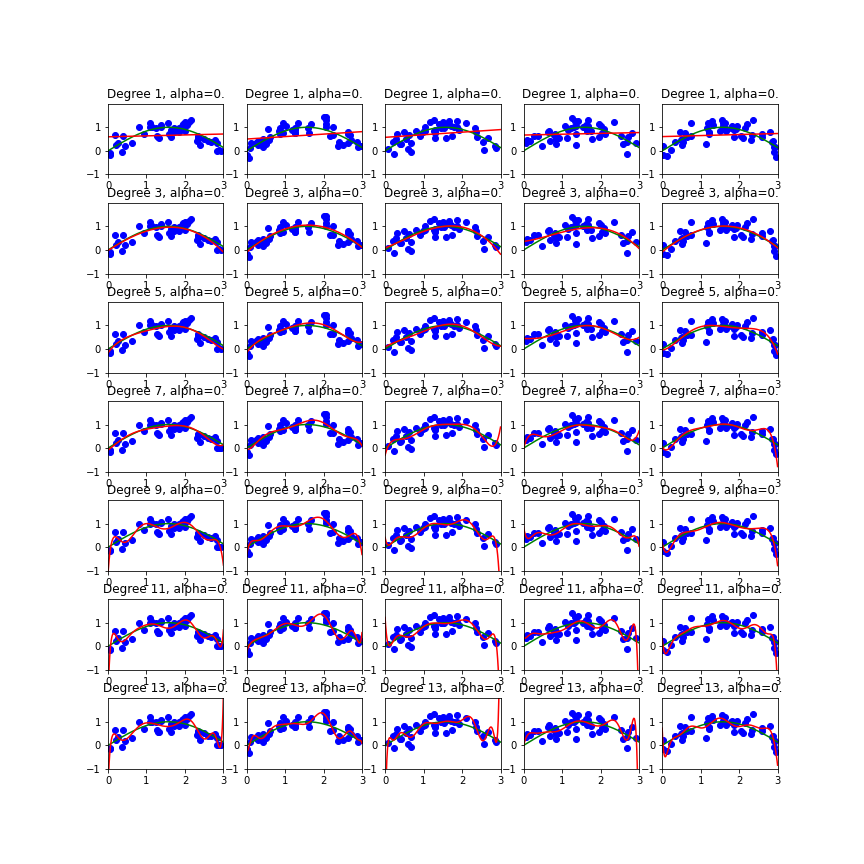

/home/b/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.36036e-20): result may not be accurate.
  overwrite_a=True).T
/home/b/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.33304e-19): result may not be accurate.
  overwrite_a=True).T
/home/b/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.1249e-20): result may not be accurate.
  overwrite_a=True).T
/home/b/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.35991e-20): result may not be accurate.
  overwrite_a=True).T
/home/b/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.65437e-20): result may not be accurate.
  overwrite_a=True).T


In [21]:
Regr(0.0,3.0, 50).show(np.arange(1,15,2), [0,0,0,0,0], get_same_seed_in_each_column)

Since the models with overfitting tend to have large weights, a yet another method for reducing overfitting is introducing a penalty for large weights. Let us see this effect on the next graph, where in each column we use larger $L^2$ penalty (i.e., Ridge regression). In each row, we have the same dataset (with $15$ samples).

<IPython.core.display.Javascript object>


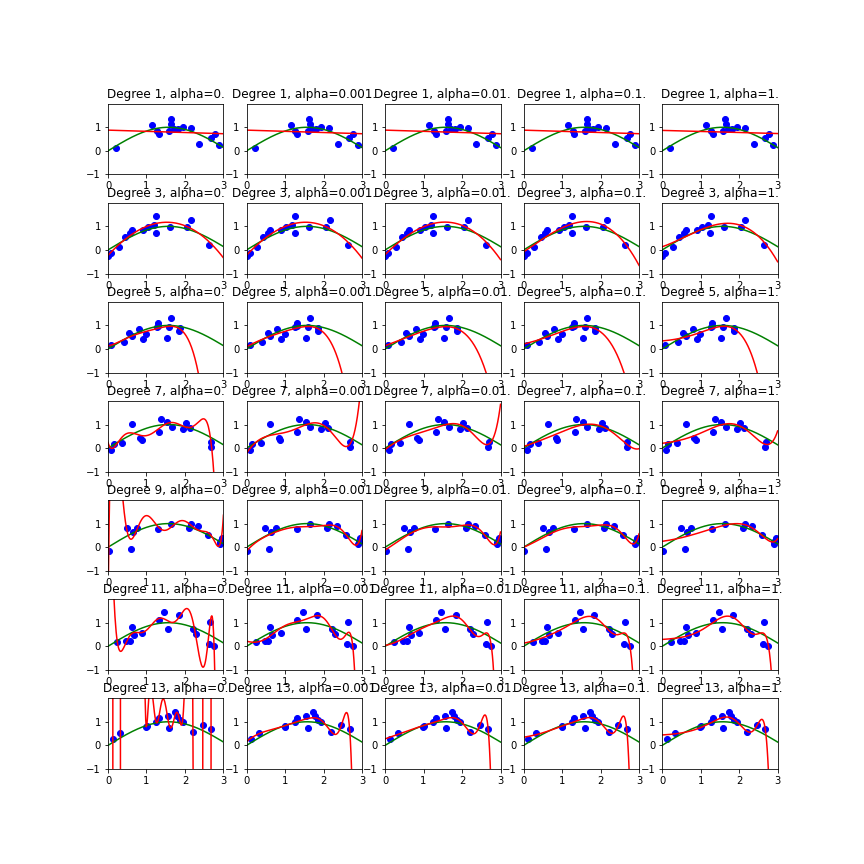

/home/b/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.92532e-18): result may not be accurate.
  overwrite_a=True).T
/home/b/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.74946e-21): result may not be accurate.
  overwrite_a=True).T


In [27]:
def get_same_seed_in_each_row(row, column):
    return row
Regr(0.0,3.0, 15).show(np.arange(1,15,2), [0, 0.001, 0.01, 0.1, 1], get_same_seed_in_each_row)